In [1]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/")
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import numpy as np
# font_path = "C:/WINDOWS/FONTS/TIMES.TTF"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family=font_name)

In [2]:
rcparams = {"font.family":"serif", "mathtext.fontset":"stix"}
plt.rcParams.update(rcparams)
plt.rcParams["font.serif"] = ["Time New Roman"] + plt.rcParams["font.serif"]

mpl.rc('xtick', labelsize=7)
mpl.rc('ytick', labelsize=10)

In [3]:
def value_outsys(A, length):
    temp_list = []
    d = len(A)
    avg = sum(A) / d
    for i in range(length):
        temp_list.append(avg)
    return temp_list

In [4]:
def average_outsys(A, term):
    length = len(A)
    temp_list = []
    temp_value = 0
    for i in range(length):
        temp_value += A[i]
        if i % term == term-1:
            temp_list.append(temp_value / (term))
            temp_value = 0
    temp_list.insert(0, A[0])
    return temp_list

In [5]:
Y_1 = np.load("/content/drive/My Drive/Colab Notebooks/result/CNN_c250_acc_delay.npy") / 1000
Y_2 = np.load("/content/drive/My Drive/Colab Notebooks/result/FCN_c250_acc_delay.npy") / 1000
Y_3 = np.load("/content/drive/My Drive/Colab Notebooks/result/NO_result_delay_c250.npy") / 1000
Y_4 = np.load("/content/drive/My Drive/Colab Notebooks/result/SD_result_delay_c250.npy") / 1000
Y_5 = np.load("/content/drive/My Drive/Colab Notebooks/result/SC_result_delay_c250.npy") / 1000
Y_11 = average_outsys(Y_1, 25)
Y_22 = average_outsys(Y_2, 25)
Y_33 = average_outsys(Y_3, 25)
Y_44 = average_outsys(Y_4, 25)
Y_55 = average_outsys(Y_5, 25)

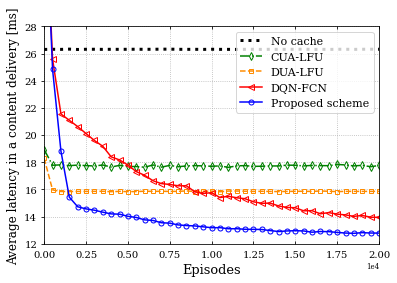

In [9]:
list_size = range(0, 20001, 500)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(list_size, Y_33, ':', color='k', linewidth=3.0, label='No cache')
ax.plot(list_size, Y_55, '-.', marker='d', markersize=5, color='green', fillstyle='none', label='CUA-LFU')
ax.plot(list_size, Y_44, '--', marker='s', markersize=4, color='darkorange', fillstyle='none', label='DUA-LFU')
ax.plot(list_size, Y_22, color='r', marker='<', markersize=6, fillstyle='none', label='DQN-FCN')
ax.plot(list_size, Y_11, color='b', marker='o', markersize=5, fillstyle='none', label='Proposed scheme')

plt.xlabel("Episodes", fontsize=13)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=10, top=True)
plt.ylabel("Average latency in a content delivery [ms]", fontsize=12)
plt.legend(fontsize=11, loc="upper right")
plt.grid(True, alpha=2.0, linestyle=':')
plt.ylim(12, 28)
plt.xlim(0, 20001)
plt.show()